In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date 

In [4]:
commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [5]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain2=study_domain1.groupby("quest_id").sum()

#study_domain= study_domain.drop(columns="key")
#study_domain.set_index('quest_id')
#study_domain

In [6]:
technologyy = pd.get_dummies(data=technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()


In [7]:
industry1=pd.get_dummies(data=industry[["quest_id","key","values"]], columns= ["values"], prefix="", prefix_sep="")
industry2= industry1.groupby("quest_id").sum()
#industry2

In [8]:
#quest1=quest.groupby("quest_id").sum()
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

merge5=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
#mergee=merge5.isna().sum()
#merge5=merge5.drop(columns=['Commune_en', 'modified_at'])


In [9]:
merge5['created_at'] =merge5['created_at'].apply(lambda x : str(x).split("T")[0])
merge11=pd.merge(left=merge5, right=study_domain2, how = 'left',on='quest_id')


In [10]:

transaction['Payment Method'] = 'Moncash'
ord['Payment Method'] = 'Credit Card/Paypal'
x = transaction.loc[:,['Payment Method','user_id']]
y = ord.loc[:,['Payment Method','user_id']]
trans_ord= pd.concat([x,y],axis=0)

enroll1=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )
#enroll1.shape
#enrol=enroll.groupby('user_id').sum()

enroll11= enroll1.loc[:,['Payment Method','user_id','quest_id']]
moy_enroll=enroll1['percentage_completed'].value_counts(ascending=True).mean()
moy_enroll
moy_enroll= moy_enroll/10
en=enroll1[enroll1['percentage_completed'] > moy_enroll]
en['percentage_completed'].to_frame


<bound method Series.to_frame of 13     0.930233
16     0.697674
20     0.534884
21     0.418605
22     0.953488
24     0.452381
27     0.906977
37     0.833333
44     0.813953
45     0.619048
48     0.511628
50     0.860465
52     0.953488
57     0.452381
58     0.523810
68     0.953488
73     0.534884
75     0.906977
76     0.883721
77     0.953488
82     0.744186
85     0.953488
88     0.674419
89     0.790698
90     0.906977
91     0.395349
92     0.906977
93     0.465116
94     0.488372
99     0.813953
103    0.604651
104    0.418605
107    0.395349
108    0.604651
111    0.883721
123    0.418605
124    0.883721
129    0.697674
131    0.465116
132    0.418605
133    0.767442
139    0.604651
Name: percentage_completed, dtype: float64>

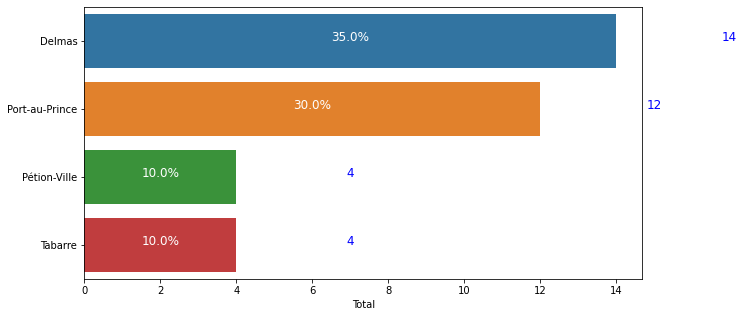

,Total,Percent
Delmas,14,0.35
Port-au-Prince,12,0.30
Pétion-Ville,4,0.10
Tabarre,4,0.10


In [20]:
prob_category(data=merge200,top_n =4 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

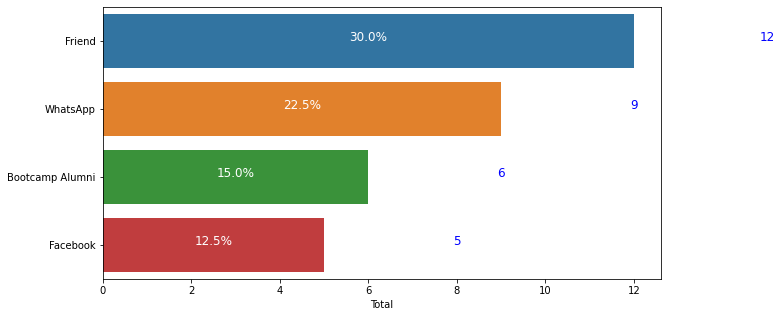

,Total,Percent
Friend,12,0.300
WhatsApp,9,0.225
Bootcamp Alumni,6,0.150
Facebook,5,0.125


In [19]:
merge200=pd.merge(left=en, right=merge5, how = 'left',on='quest_id')

prob_category(data=merge200,top_n =4 ,col="hear_AA_1",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

In [40]:
hearr.sort_values(by=('count','female'),ascending=False).head(5)

,count
gender,female
hear_AA_1,
Friend,11
WhatsApp,9
Bootcamp Alumni,8
Facebook,6
ESIH,5


In [21]:
merge20=pd.merge(left=merge11, right=, how = 'left',on='quest_id')
merge20['created_at'].isnull().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Name: created_at, Length: 250, dtype: bool>

In [22]:
#merge20['dob'] = pd.to_datetime(merge20['dob'])

final_merge.set_index('quest_id')
final_merge

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other
0,0,male,25/08/1998,HT0111,2021-02-14,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,male,17/05/1996,HT0111,2021-02-16,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,male,24/11/1996,HT0111,2021-02-16,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
246,246,male,08/10/1990,HT0621,2021-03-10,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
final_merge['dob'] = final_merge['dob'].astype(str)

final_merge['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final_merge['dob'] = pd.to_datetime(final_merge['dob'])

def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

final_merge['Age'] = final_merge['dob'].apply(Calculate_Age)
final_merge.reset_index()

,index,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,...,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Age
0,0,0,male,1998-08-25,HT0111,2021-02-14,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1,1,1,female,1996-09-29,HT0111,2021-02-16,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2,2,2,male,1996-05-17,HT0111,2021-02-16,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,25.0
3,3,3,male,1996-11-24,HT0111,2021-02-16,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,24.0
4,4,4,male,1997-07-20,HT0111,2021-02-16,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,male,1994-02-15,HT0621,2021-03-02,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,27.0
246,246,246,male,1990-08-10,HT0621,2021-03-10,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0
247,247,247,male,1993-12-28,HT0621,2021-03-14,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,27.0
248,248,248,male,1992-04-17,HT0412,2021-03-08,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0


In [25]:
#check_for_nan = final_merge['Age'].isnull().sum()
#check_for_nan
move = final_merge.pop('Age')
final_merge.insert(3,'Age',move)
final_merge['Age'] = final_merge['Age'].fillna(final_merge['Age'].mean())
final_merge['Age'] = final_merge['Age'].astype(int)
final_merge['quest_id']
final_merge.columns

Index(['Unnamed: 0', 'gender', 'dob', 'Age', 'commune', 'created_at',
       'modified_at', 'department', 'education_level', 'university',
       'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id', 'Commune_en', 'Commune_FR', 'Commune_Id', 'Departement',
       'ADM1_PCODE', 'Accounting', 'Computer Science', 'Economics',
       'Electrical Engineering', 'Law', 'Management', 'Medicine', 'Statistics',
       'other_x', 'Payment Method', 'user_id', 'Bash', 'Excel', 'Git', 'Java',
       'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA',
       'other_y', 'Communications', 'Consulting', 'Education', 'Energy',
       'Finance', 'Healthcare', 'Insurance', 'Manufacturing', 'Marketing',
       'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Technology (Software/ Internet)', 'Transportation', 'other'],
      dtype='object')

In [105]:
final_merge['Age'].isnull().sum()

6

In [106]:
for col in final_merge.columns:
  print(f"{col} ->{final_merge[col].nunique()}")

Unnamed: 0 ->250
gender ->2
dob ->236
commune ->35
created_at ->28
department ->10
education_level ->6
university ->7
study_domain ->31
current_employed ->3
formal_sector_job ->3
have_computer_home ->3
internet_at_home ->3
hear_AA_1 ->10
after_AA ->7
quest_id ->250
Commune_FR ->35
Commune_Id ->35
Departement ->9
ADM1_PCODE ->9
Accounting ->2
Computer Science ->2
Economics ->2
Electrical Engineering ->2
Law ->2
Management ->2
Medicine ->2
Statistics ->2
other_x ->2
Payment Method ->2
user_id ->102
Bash ->2
Excel ->2
Git ->2
Java ->2
JavaScript ->2
PHP ->2
PowerBI or Tableau ->2
Python ->2
R ->2
SQL ->2
VBA ->2
other_y ->2
Communications ->2
Consulting ->2
Education ->2
Energy ->2
Finance ->2
Healthcare ->2
Insurance ->2
Manufacturing ->2
Marketing ->2
Public Sector/ Non-Profit Agencies ->2
Retail/ E-Commerce ->2
Technology (Software/ Internet) ->2
Transportation ->2
other ->2
Age ->30


In [107]:
g=pd.isnull(final_merge['Age'])
final_merge[g]


,Unnamed: 0,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,...,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Age
35,35,male,NaT,HT0111,2021-02-23,HT01,Other,unknown,['item8'],No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
58,58,male,NaT,HT0111,2021-03-14,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
116,116,female,NaT,HT0112,2021-03-03,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
154,154,female,NaT,HT0113,2021-02-18,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN
194,194,male,NaT,HT0131,2021-02-16,HT01,Bachelors (bacc +4),Université INUKA,['item1'],No,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
221,221,male,NaT,HT0443,2021-02-19,HT04,High School (16 years),unknown,['item3'],unknown,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


In [108]:
male = final_merge[final_merge.gender=="male"]
female = final_merge[final_merge.gender == "female"]


In [109]:
final_merge.reset_index()
final_merge.reset_index()
final_merge

,Unnamed: 0,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,...,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Age
0,0,male,1998-08-25,HT0111,2021-02-14,NAN,unknown,unknown,[],unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1,1,female,1996-09-29,HT0111,2021-02-16,HT01,Bachelors (bacc +4),other,['other'],No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2,2,male,1996-05-17,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,25.0
3,3,male,1996-11-24,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,24.0
4,4,male,1997-07-20,HT0111,2021-02-16,HT01,High School (16 years),unknown,['other'],No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,1994-02-15,HT0621,2021-03-02,HT06,Bachelors (bacc +4),other,['other'],Yes,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,27.0
246,246,male,1990-08-10,HT0621,2021-03-10,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],Yes,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0
247,247,male,1993-12-28,HT0621,2021-03-14,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],Yes,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,27.0
248,248,male,1992-04-17,HT0412,2021-03-08,HT04,Bachelors (bacc +4),other,['item1'],No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0


<Figure size 1440x1080 with 0 Axes>

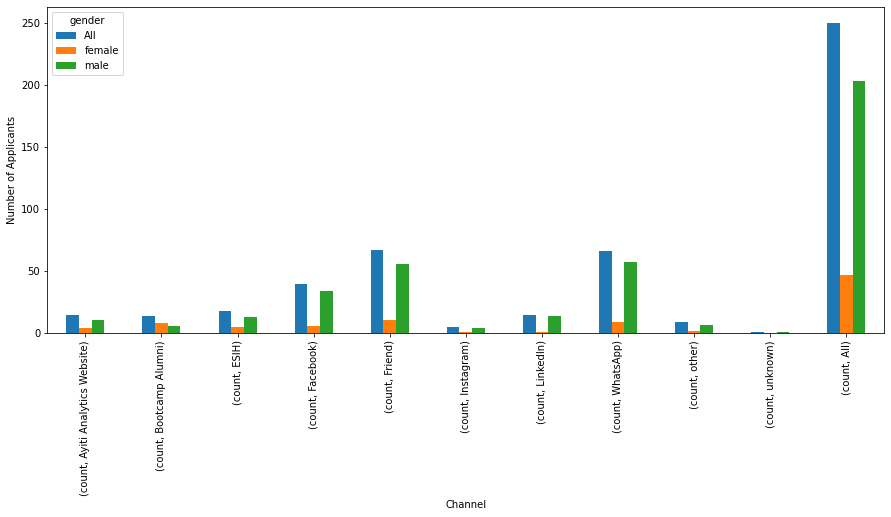

In [48]:

result3 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['hear_AA_1'],aggfunc=['count'],fill_value = 0,margins=True)
plt.figure(figsize=(20,15))
ax = result3.sort_index().T.plot(kind='bar',figsize=(15,6))
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Channel') 

In [20]:
result3


count                                       \
hear_AA_1 Ayiti Analytics Website Bootcamp Alumni ESIH Facebook Friend   
gender                                                                   
female                          4               8    5        6     11   
male                           11               6   13       34     56   
All                            15              14   18       40     67   

                                                          
hear_AA_1 Instagram LinkedIn WhatsApp other unknown  All  
gender                                                    
female            1        1        9     2       0   47  
male              4       14       57     7       1  203  
All               5       15       66     9       1  250

In [12]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()



In [13]:
def prob_category(data,top_n,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=()):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result


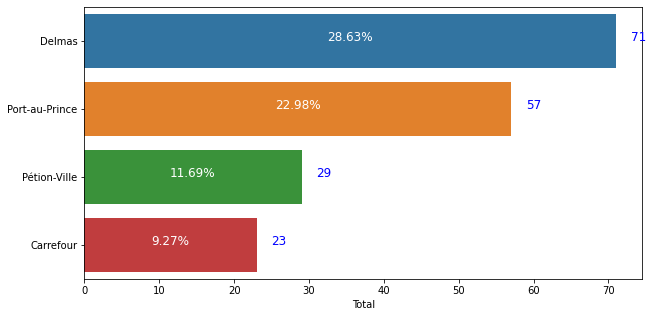

,Total,Percent
Delmas,71,0.286290
Port-au-Prince,57,0.229839
Pétion-Ville,29,0.116935
Carrefour,23,0.092742


In [26]:
#fifi=pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value = 0,margins=True)
prob_category(data=final_merge,top_n =4 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))



In [280]:
#fifi=pd.pivot_table(final_merge,'quest_id',index = ['Commune_FR'],columns=['gender'],aggfunc=['count'],fill_value = 0)
#fifi=fifi.iloc[]
#fifi=fifi.sort_values(by=('count','female','male'),ascending = False)
#prob_category(data=fifi,top_n =4 ,col="gender",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

KeyError: 'gender'

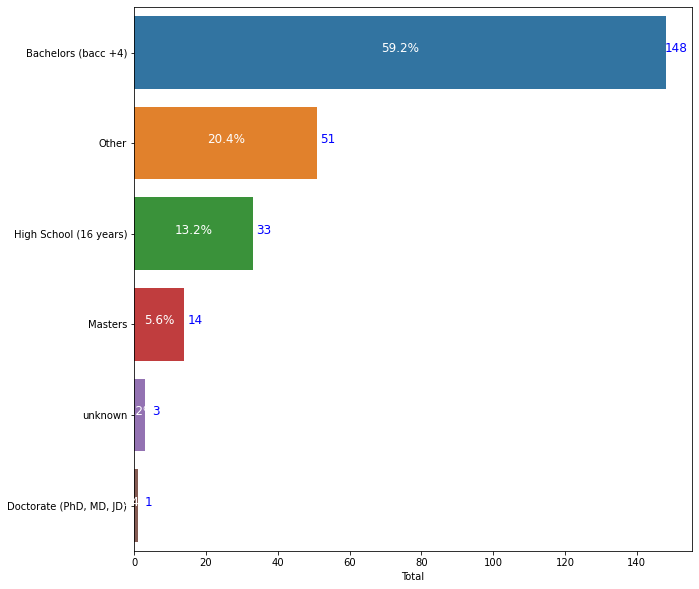

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [27]:
prob_category(data=final_merge ,top_n=7, col="education_level",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,10))

In [32]:
result999 =final_merge[(final_merge['education_level'] =='Bachelors (bacc +4)') | (final_merge['education_level'] =='Masters') | (final_merge['education_level'] =='Doctorate (PhD, MD, JD)')  ]
result999
result999.shape[0]/final_merge.shape[0]

0.652

<Figure size 720x432 with 0 Axes>

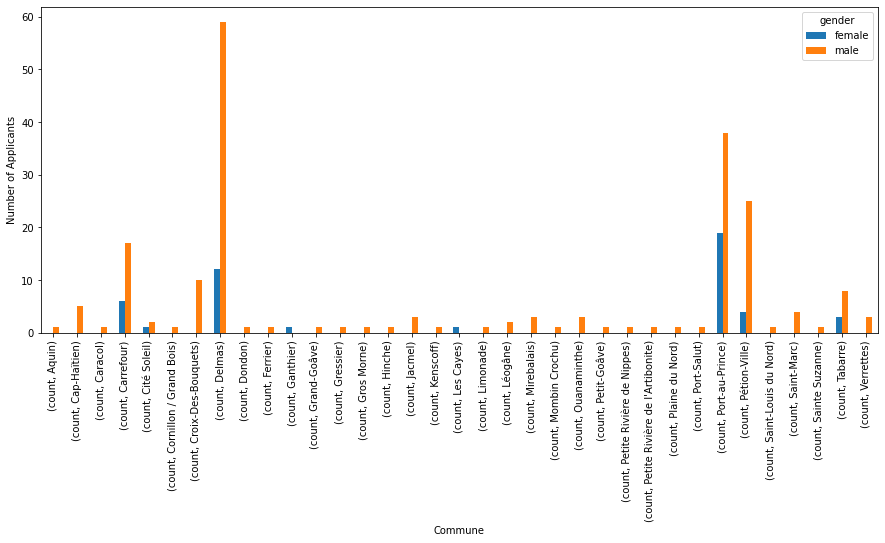

In [184]:
result2 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value=0)
#res=result2.sort_values(by=('count','male'),ascending=False)
#res=res.iloc[:5,:]
#generate_barchart(data=res,title="Total et Percent By Sex",abs_value="Total",rel_value="Percent")
plt.figure(figsize=(10,6))
ax = result2.sort_index().T.plot(kind='bar',figsize=(15,6))
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Commune')

In [159]:

#prob_category(data=final_merge,top_n =4 ,col="hear_AA_1",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

TypeError: 'method' object is not subscriptable

In [22]:
result2

count                                            \
Commune_FR Aquin Cap-Haïtien Caracol Carrefour Cité Soleil   
gender                                                       
female         0           0       0         6           1   
male           1           5       1        17           2   

                                                                            \
Commune_FR Cornillon / Grand Bois Croix-Des-Bouquets Delmas Dondon Ferrier   
gender                                                                       
female                          0                  0     12      0       0   
male                            1                 10     59      1       1   

            ...                                                           \
Commune_FR  ... Petite Rivière de l'Artibonite Plaine du Nord Port-Salut   
gender      ...                                                            
female      ...                              0              0          0   
male        ...                              1              1          1   

                                                                       \
Commune_FR Port-au-Prince Pétion-Ville Saint-Louis du Nord Saint-Marc   
gender                                                                  
female                 19            4                   0          0   
male                   38           25                   1          4   

                                             
Commune_FR Sainte Suzanne Tabarre Verrettes  
gender                                       
female                  0       3         0  
male                    1       8         3  

[2 rows x 35 columns]

In [23]:
result4 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['university'],aggfunc=['count'],fill_value = 0,margins=True)
rresult4

NameError: name 'rresult4' is not defined

In [39]:
final_merge

,Unnamed: 0,gender,dob,Age,commune,created_at,department,education_level,university,study_domain,...,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other
0,0,male,1998-08-25,22,HT0111,2021-02-14,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,1996-09-29,24,HT0111,2021-02-16,HT01,Bachelors (bacc +4),other,['other'],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,male,1996-05-17,25,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,male,1996-11-24,24,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,4,male,1997-07-20,23,HT0111,2021-02-16,HT01,High School (16 years),unknown,['other'],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,1994-02-15,27,HT0621,2021-03-02,HT06,Bachelors (bacc +4),other,['other'],...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
246,246,male,1990-08-10,30,HT0621,2021-03-10,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
247,247,male,1993-12-28,27,HT0621,2021-03-14,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
248,248,male,1992-04-17,29,HT0412,2021-03-08,HT04,Bachelors (bacc +4),other,['item1'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
quest.set_index('gender')
a=quest.loc[:,['university']]
a


,university
0,unknown
1,other
2,Université d'Etat d'Haïti (UEH)
3,Ecole Supérieure d'Infotronique d'Haïti (ESIH)
4,unknown
...,...
245,other
246,Université d'Etat d'Haïti (UEH)
247,Centre de Techniques de Planification et d'Eco...
248,other


In [42]:
quest.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id'],
      dtype='object')

In [59]:
#gg= pd.get_dummies(data=quest[["quest_id", "gender",'university']], columns=['gender'], prefix="", prefix_sep="")
#gg=gg.groupby("university").sum()


TypeError: get_dummies() got an unexpected keyword argument 'margins'

In [54]:
def generate_barchar(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()


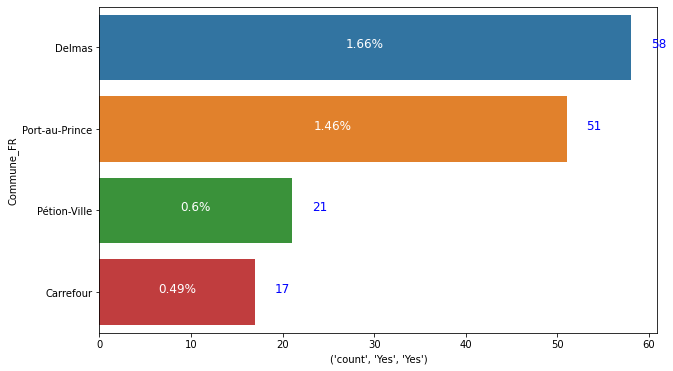

,count,Percent
internet_at_home,Yes,
have_computer_home,Yes,
Commune_FR,,
Delmas,58,1.657143
Port-au-Prince,51,1.457143
Pétion-Ville,21,0.600000
Carrefour,17,0.485714


In [55]:
e = pd.pivot_table(final_merge,'quest_id',index='Commune_FR',columns=['internet_at_home','have_computer_home'],aggfunc = ['count'],fill_value=0)
#app = e.sort_values(by=('count','Yes','Yes'),ascending = False)
e

g=e.iloc[:,3:4]
g
#prob_category(data=g ,top_n=7, col='internet_at_home','have_computer_home',abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,10))
both=g.sort_values(by=('count','Yes','Yes'),ascending = False)

#g['Percent'] = g[('count','Yes','Yes')]/g.shape[0]
#prob_category(data=g ,top_n=5, col=('count','Yes','Yes'),abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,15))
#generate_barchart(g, title ="",abs_value =('count','Yes','Yes'),rel_value="Percent",figsize =(10,6))
both=both.iloc[:4,:]
both['Percent'] = both[('count','Yes','Yes')]/g.shape[0]
generate_barchar(both, title ="",abs_value =('count','Yes','Yes'),rel_value="Percent",figsize =(10,6))
both

In [192]:
resss=pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['education_level'],aggfunc=['count'],fill_value = 0)
resss

count                          \
education_level Bachelors (bacc +4) Doctorate (PhD, MD, JD)   
gender                                                        
female                           23                       0   
male                            125                       1   

                                                              
education_level High School (16 years) Masters Other unknown  
gender                                                        
female                               5       5    13       1  
male                                28       9    38       2

In [189]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          250 non-null    int64         
 1   gender                              250 non-null    object        
 2   dob                                 244 non-null    datetime64[ns]
 3   Age                                 250 non-null    int32         
 4   commune                             250 non-null    object        
 5   created_at                          250 non-null    object        
 6   department                          250 non-null    object        
 7   education_level                     250 non-null    object        
 8   university                          250 non-null    object        
 9   study_domain                        250 non-null    object        
 10  current_employed          